In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 데이터 딕셔너리
 - survived : 생존 = 1 죽음 = 0
 - pclass : 승객 등급. 1등급, 2등급, 3등급
 - sibsp : 합께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호
 - cabin : 선실 번호
 - embarked : 탑승 장소 S=Southhampton, C=Cherbourg, Q=Queenstown

- sns.factorplot(x,y,hue) : y평균값 그래프. hue로 지정된 필드의 종류만큼 라인이 그려짐.
- sns.violinplot(x,y,hue) : y값의 범위와 분포를 알 수 있는 그래프.


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

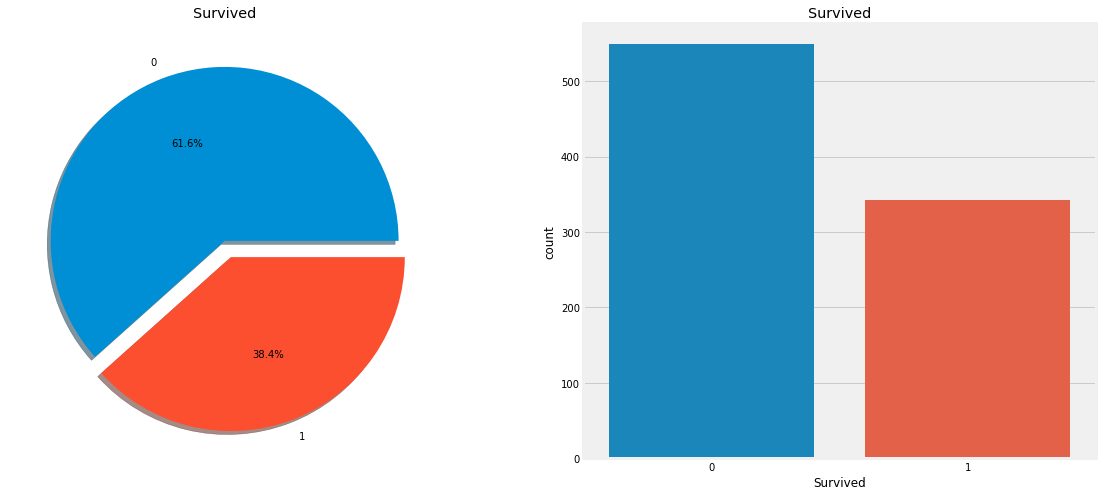

In [12]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax= ax[0], shadow =True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [14]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

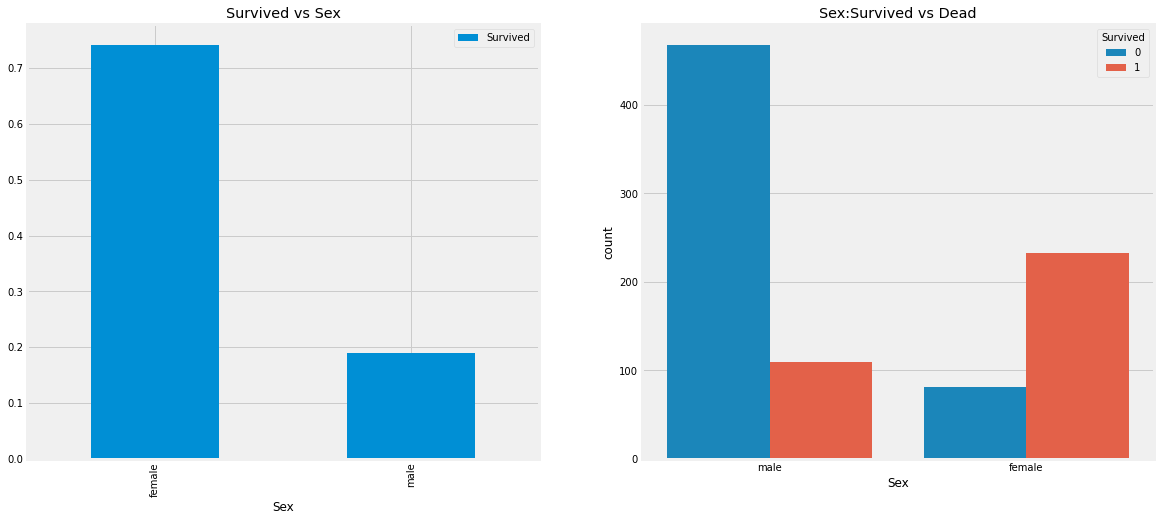

In [22]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [24]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


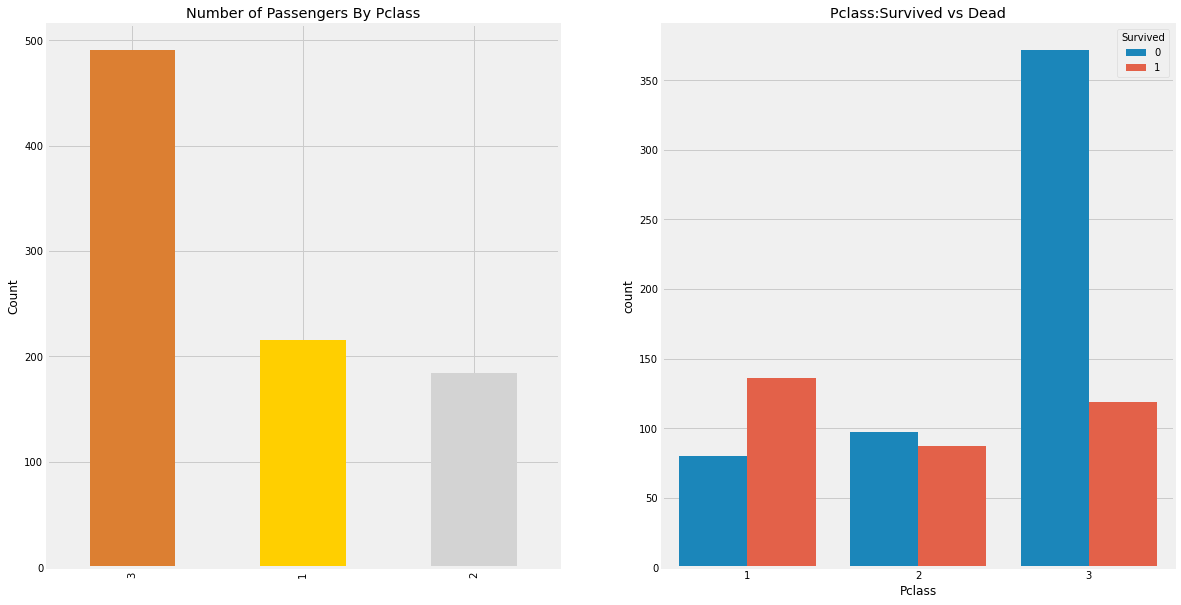

In [28]:
f, ax = plt.subplots(1, 2, figsize = (18,10))
data['Pclass'].value_counts().plot.bar(color = ['#DC7F32', '#FFCF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [34]:
pd.crosstab([data.Sex, data.Survived], data.Pclass,margins = True).style.background_gradient(cmap=('summer_r'))

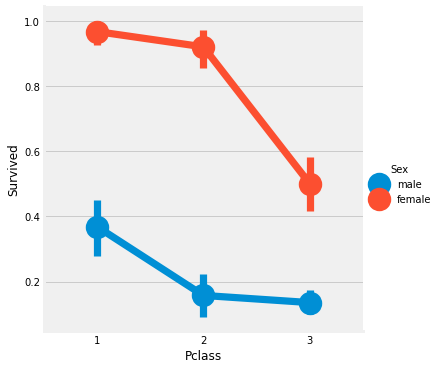

In [41]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data=data, aspect = 1)
plt.show()

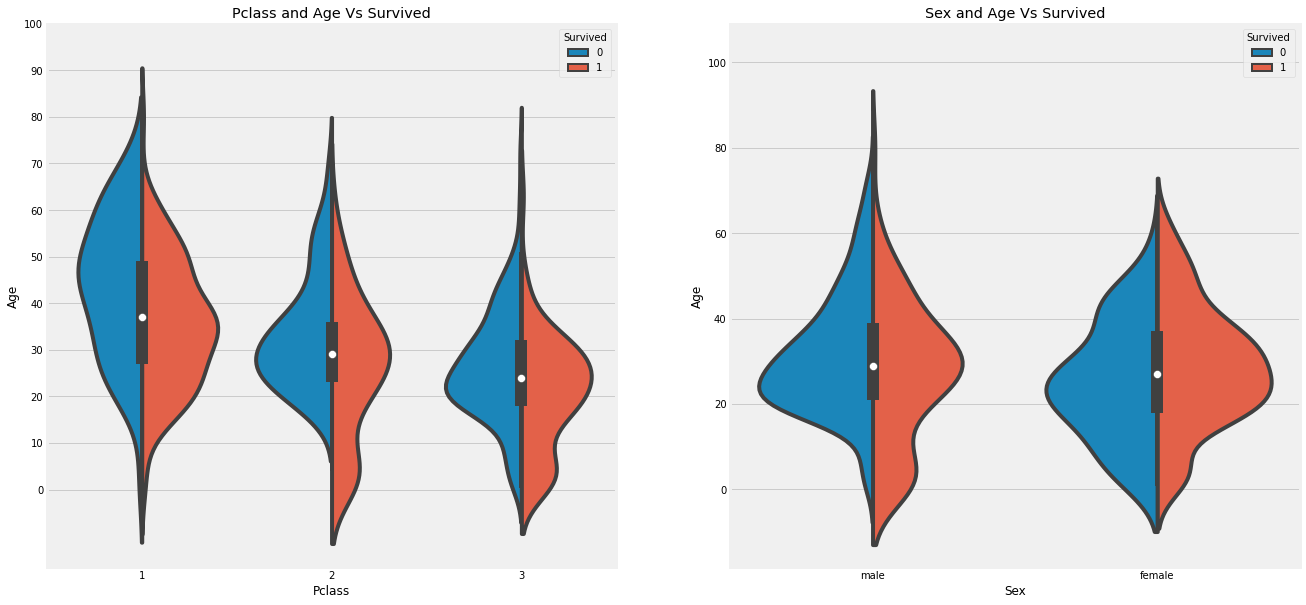

In [48]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax =ax[0])
ax[0].set_title('Pclass and Age Vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', split= True, data= data, ax=ax[1])
ax[1].set_title('Sex and Age Vs Survived')
ax[1].set_yticks(range(0,110), 100)
plt.show()

In [53]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [56]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [54]:
data['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Lady          1
Capt          1
Jonkheer      1
Countess      1
Ms            1
Mme           1
Don           1
Name: Initial, dtype: int64

In [59]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [60]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [62]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [63]:
data.Age.isnull().sum()

0

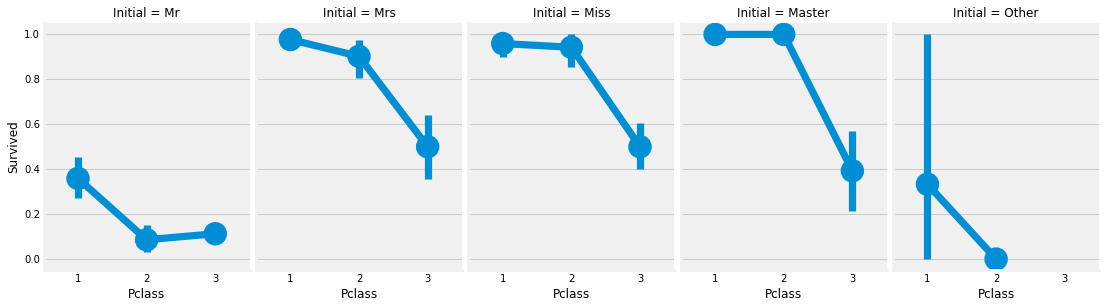

In [109]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data=data)
fig = plt.gcf()
fig.set_size_inches(15,4)
plt.show()

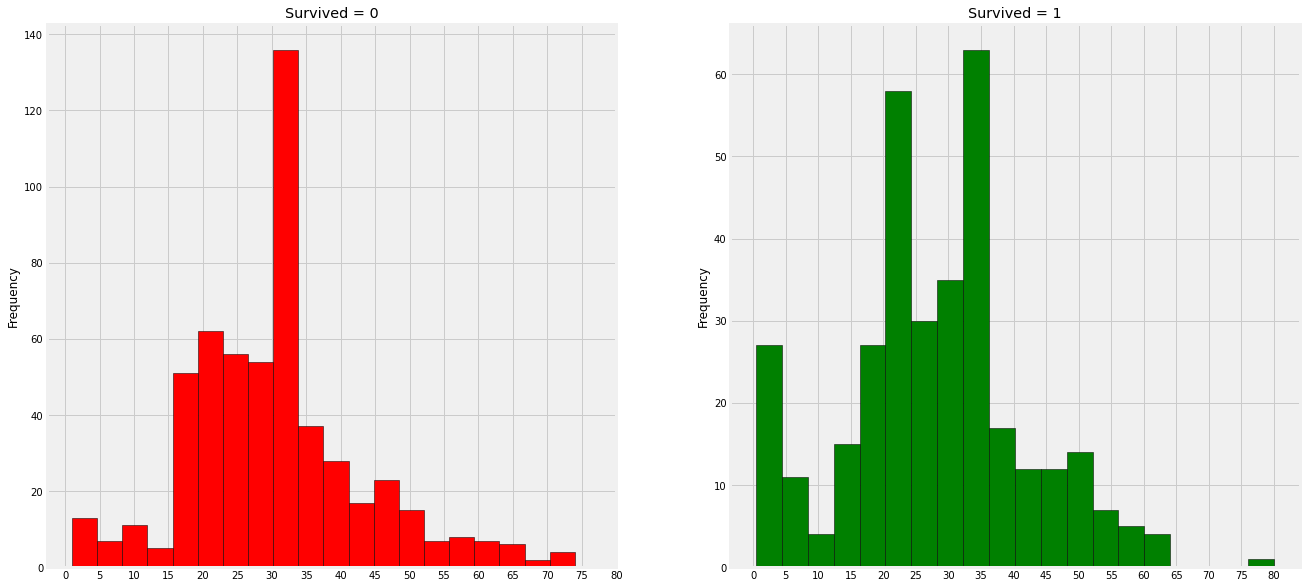

In [68]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20,edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

In [69]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap = 'summer_r')

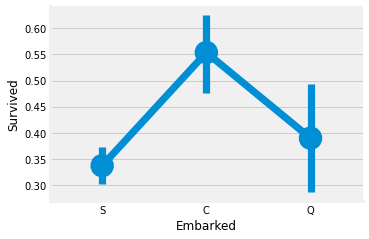

In [74]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

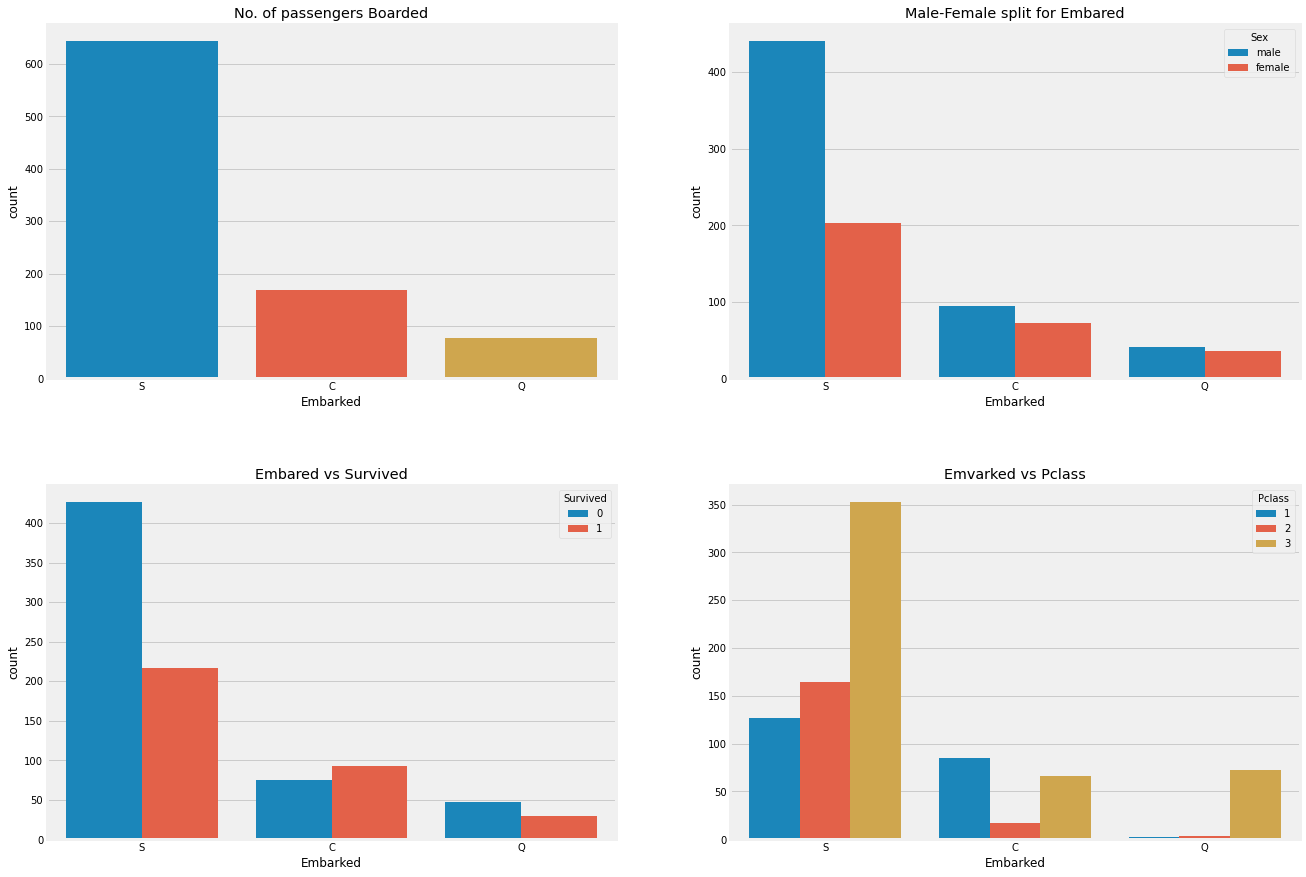

In [82]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data,ax=ax[0,0])
ax[0,0].set_title('No. of passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female split for Embared')

sns.countplot('Embarked', hue = 'Survived', data=data,ax=ax[1,0])
ax[1,0].set_title('Embared vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data=data,ax=ax[1,1])
ax[1,1].set_title('Emvarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

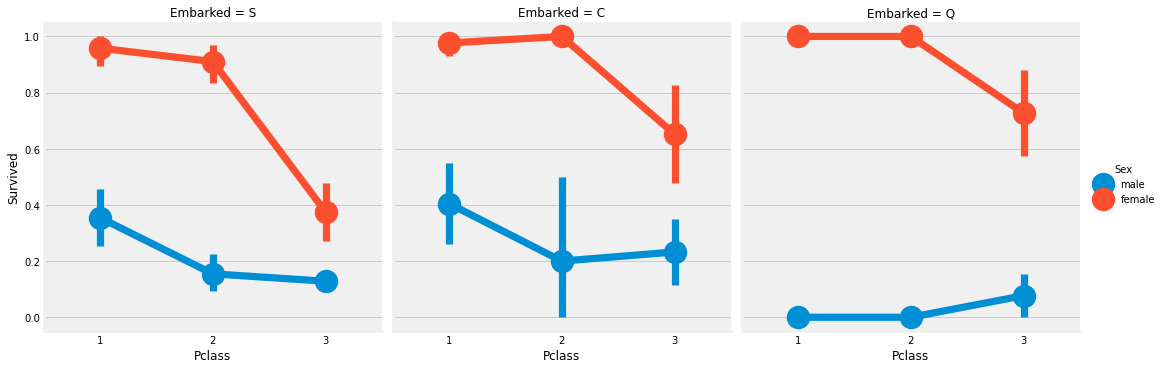

In [86]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data=data)
plt.show()

# Filling Embared NaN
as we saw that maximum passengers boarded from port S. we replace NaN with S.


In [89]:
data['Embarked'].fillna('S', inplace=True)
data['Embarked'].isnull().sum()

0

# Check SibSip
 - sibling = brother, sister etc
 - spouse = husband, wife

In [90]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient('summer')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


 - sns.barplot의 막대는 95% 신뢰구간
 - 표준편차를 할려면 ci='sd' 추가

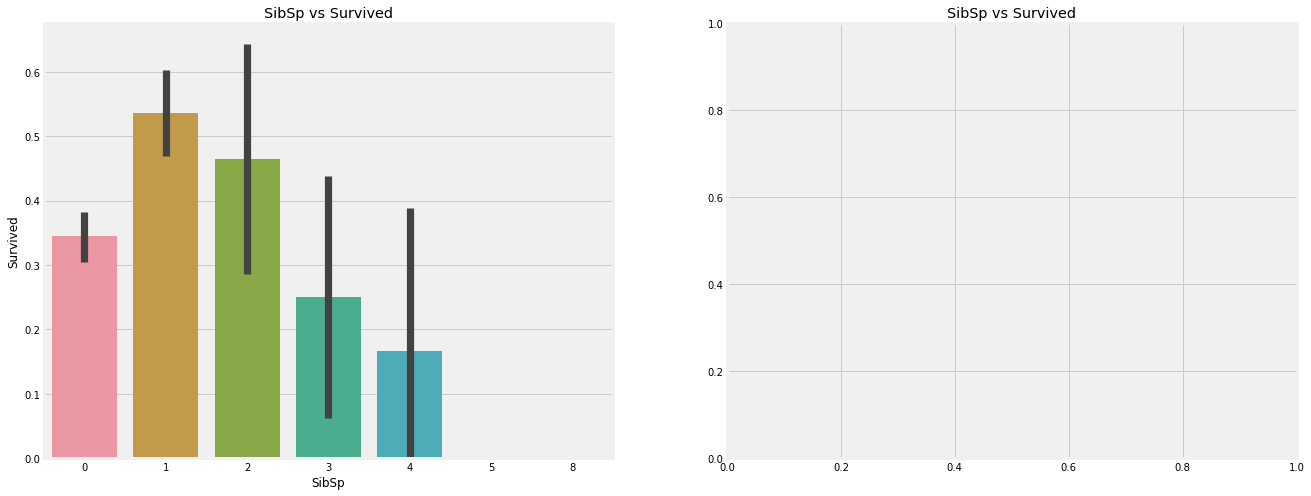

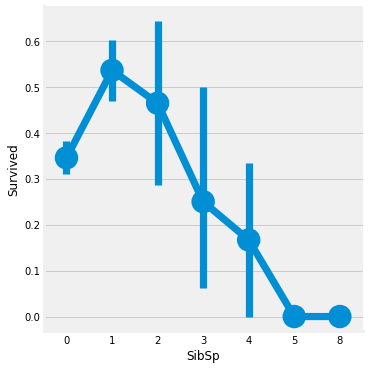

In [125]:
# sns.barplot의 막대는 95% 범위
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('SibSp', 'Survived', data = data, ax=ax[0] #ci='sd')
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(3)
plt.show()

In [126]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient('summer')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Check Parch.

In [127]:
pd.crosstab(data.Parch, data.Survived).style.background_gradient('summer')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [128]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient('summer')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


ValueError: Could not interpret input 'Survived'

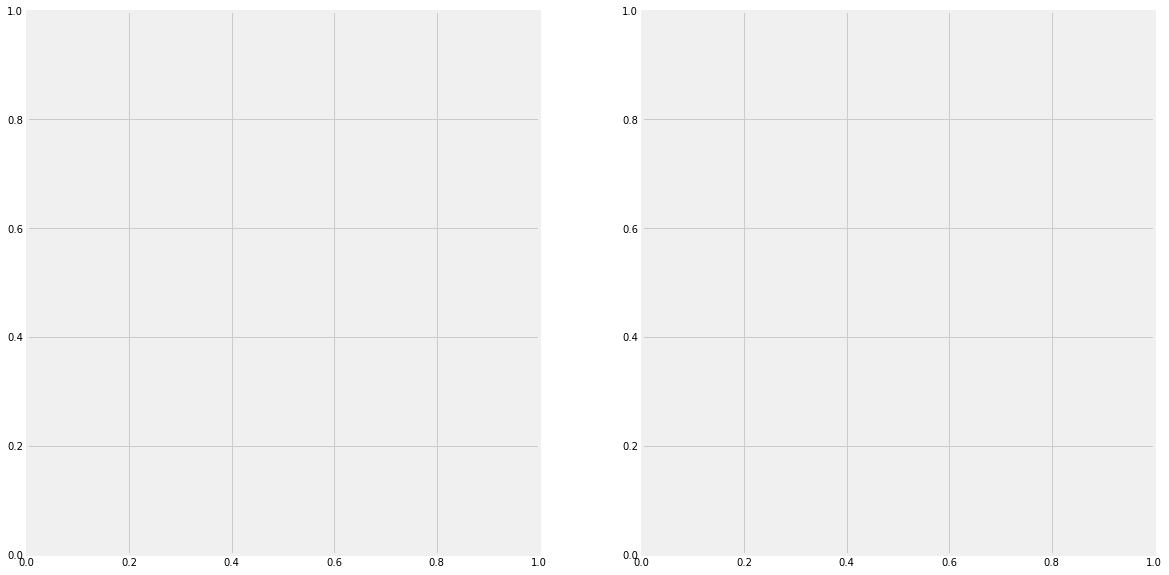

In [171]:
f, ax = plt.subplots(1, 2, figsize=(18,10))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0], ci= None)
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1], )

plt.show()

# Check Fare feature

In [141]:
print('hightest : ', data.Fare.max())
print('lowest : ', data.Fare.min())
print(data['Fare'].mean())

hightest :  512.3292
lowest :  0.0
32.2042079685746


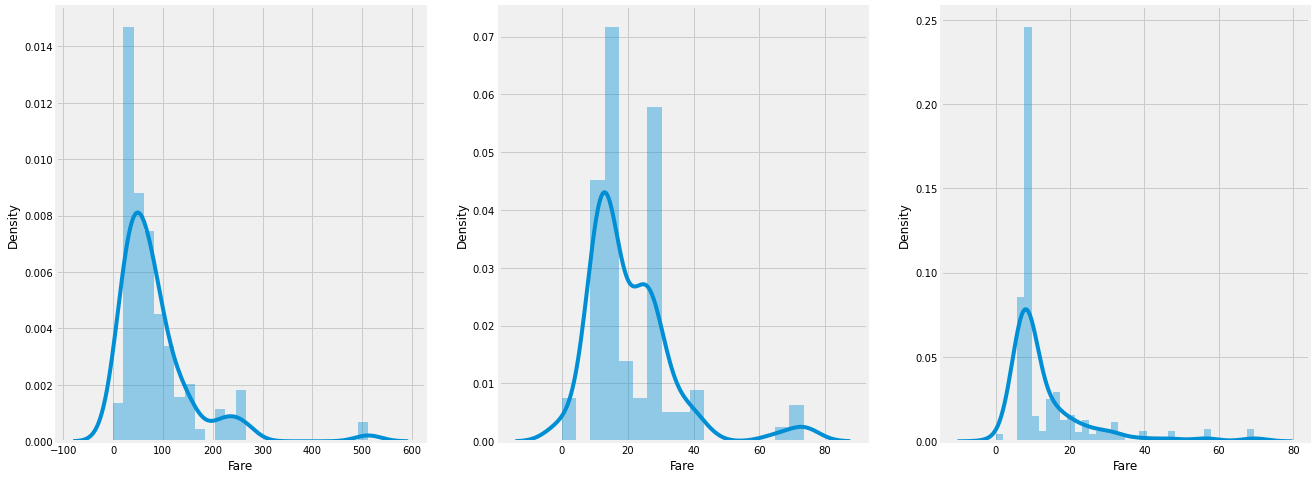

In [142]:
f, ax = plt.subplots(1,3,figsize = (20,8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
plt.show()

## Correltation Between The Features

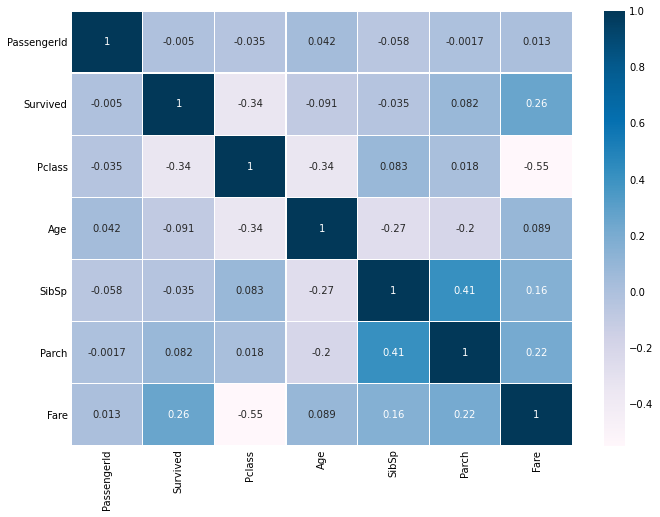

In [146]:
sns.heatmap(data.corr(), annot=True, cmap='PuBu', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [ ]:
del data

In [156]:
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


train_test = [train, test]
print(train_test[0].shape)
print(train_test[1].shape)

(891, 12)
(418, 11)


In [161]:
import re
for data in train_test:
    data['Initial'] = ''
    init = []
    p = re.compile('([A-Za-z]+)\.')
    #print(p)
    for value in data['Name']:
        #print(p.search(value).group())
        init.append(p.search(value).group())
    data['Initial'] = init
    
data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


In [162]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [187]:
pre = ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
aft = ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr']

for data in train_test:
    data['Initial'].replace(pre, aft, inplace = True)


In [175]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [177]:
train_test.groupby('Initial')['Age'].mean()

AttributeError: 'list' object has no attribute 'groupby'

In [188]:
for data in train_test:
    print(data['Initial'])
    data['Initial'].replace(pre, aft, inplace = True)
    

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Initial, Length: 891, dtype: object
0          Mr.
1         Mrs.
2          Mr.
3          Mr.
4         Mrs.
        ...   
413        Mr.
414      Dona.
415        Mr.
416        Mr.
417    Master.
Name: Initial, Length: 418, dtype: object


In [186]:
train.groupby('Initial')['Age'].mean()

Initial
Capt.        70.000000
Col.         58.000000
Countess.    33.000000
Don.         40.000000
Dr.          42.000000
Jonkheer.    38.000000
Lady.        48.000000
Major.       48.500000
Master.       4.574167
Miss.        21.773973
Mlle.        24.000000
Mme.         24.000000
Mr.          32.368090
Mrs.         35.898148
Ms.          28.000000
Rev.         43.166667
Sir.         49.000000
Name: Age, dtype: float64